In [1]:
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [28]:
def k_means(k, data, iters):
    
    def init_centres():
        return data[np.random.choice(data.shape[0], k, replace=False), :]
    
    def nearest_centres(r):
        dists = ((data[:, np.newaxis, :] - r)**2).sum(axis=2)
        return np.argmin(dists, axis=1)
    
    def compute_centres(nearest_centres):
        return np.array([np.mean(data[nearest_centres == i, :], axis=0) for i in np.unique(nearest_centres)])
    
    r = init_centres()
    prev_nearest_centres = None
    curr_nearest_centres = nearest_centres(r)
    i = 0
    while (prev_nearest_centres is None or (prev_nearest_centres != curr_nearest_centres).any()) and i < iters:
        r = compute_centres(curr_nearest_centres)
        prev_nearest_centres = curr_nearest_centres
        curr_nearest_centres = nearest_centres(r)
        i += 1
    return r, curr_nearest_centres

In [2]:
ids = np.array([], dtype=np.int64)
with open("kosarak.dat", "r") as f:
    for line in f:
        transaction_ids = line.split()
        transaction_count = np.bincount(transaction_ids)
        if len(transaction_count) > len(ids):
            transaction_count[:len(ids)] += ids
            ids = transaction_count
        else:
            ids[:len(transaction_count)] += transaction_count

In [46]:
T = 100
bestsellers = np.argsort(ids)[-T:]
table = np.zeros((T, T))

with open("kosarak.dat", "r") as f:
    for line in f:
        transaction_ids = line.split()
        indices = np.hstack([np.nonzero(bestsellers==int(id)) for id in transaction_ids])[0]
        update_row = np.zeros(T)
        update_row[indices] = 1
        table[indices, :] += update_row
np.fill_diagonal(table, 0)

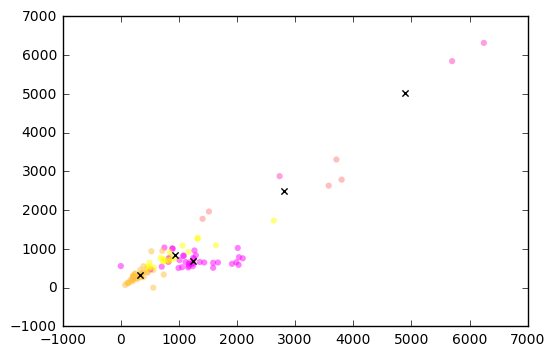

In [52]:
centres, nearest_centres = k_means(5, table, 50)
scatter(table[:, 0], table[:, 1], c=nearest_centres, cmap="spring", edgecolors="none", alpha=0.5)
scatter(centres[:, 0], centres[:, 1], marker="x", c="black")